In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np 
import time
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE
from pyGRNN import GRNN #imports the GRNN regressor module
from pyGRNN import feature_selection as FS #imports the GRNN feature selector module
import math
import numpy as np
from numpy.random import seed
seed(1)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Layer
from keras import backend as K
import gc
import numpy as np
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from mlens.visualization import corr_X_y, corrmat
from mlens.metrics import make_scorer
from mlens.model_selection import Evaluator
from scipy.stats import uniform, randint
from matplotlib.pyplot import show
%matplotlib inline

[MLENS] backend: threading


In [56]:
# Read data into a dataframe
df = pd.read_csv(r'C:\diploma\datasets\sip-task-info.csv', engine='python')

In [57]:
df.head()

,TaskNumber,Summary,Priority,RaisedByID,AssignedToID,AuthorisedByID,StatusCode,ProjectCode,ProjectBreakdownCode,Category,SubCategory,HoursEstimate,HoursActual,DeveloperID,DeveloperHoursActual,TaskPerformance,DeveloperPerformance
0,1735,Flag RI on SCM Message Summary screen using me...,1,58,58,6.0,FINISHED,PC2,PBC42,Development,Enhancement,14.0,1.75,58,1.75,12.25,12.25
1,1742,Allow RI Policies to be marked as Exhausted,1,58,42,6.0,FINISHED,PC2,PBC21,Development,Enhancement,7.0,7.00,42,7.00,0.00,0.00
2,1971,Fix Invalid UWREF Line DX402L99A1N,2,7,58,6.0,FINISHED,PC2,PBC75,Operational,In House Support,0.7,0.70,58,0.70,0.00,0.00
3,2134,New rows in the diary event for the SCM are re...,5,50,42,6.0,FINISHED,PC2,PBC42,Development,Bug,0.7,0.70,42,0.70,0.00,0.00
4,2251,Application Screen Size - Need to set Min Size...,10,46,13,6.0,FINISHED,PC2,PBC21,Development,Bug,3.5,3.50,13,3.50,0.00,0.00


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12299 entries, 0 to 12298
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TaskNumber            12299 non-null  int64  
 1   Summary               12299 non-null  object 
 2   Priority              12299 non-null  int64  
 3   RaisedByID            12299 non-null  int64  
 4   AssignedToID          12299 non-null  int64  
 5   AuthorisedByID        4265 non-null   float64
 6   StatusCode            12299 non-null  object 
 7   ProjectCode           12299 non-null  object 
 8   ProjectBreakdownCode  12299 non-null  object 
 9   Category              12299 non-null  object 
 10  SubCategory           12299 non-null  object 
 11  HoursEstimate         12299 non-null  float64
 12  HoursActual           12299 non-null  float64
 13  DeveloperID           12299 non-null  int64  
 14  DeveloperHoursActual  12299 non-null  float64
 15  TaskPerformance    

In [59]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [60]:
missing_values_table(df)

Your selected dataframe has 17 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
AuthorisedByID,8034,65.3
DeveloperPerformance,2099,17.1


In [61]:
# Find most common values in each column with empty values
mostCommonValueAuthorisedByID = df.AuthorisedByID.mode()[0]
mostCommonValueDeveloperPerformance = df.DeveloperPerformance.mode()[0]

#Replace empty values to np.nan
df.replace(r'^\s*$', np.nan, regex=True)

#Replace np.nan to most common value in each column
df.AuthorisedByID = df.AuthorisedByID.fillna(mostCommonValueAuthorisedByID)
df.DeveloperPerformance = df.DeveloperPerformance.fillna(mostCommonValueDeveloperPerformance)

In [62]:
missing_values_table(df)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [63]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.StatusCode = label_encoder.fit_transform(df.StatusCode)
df.ProjectCode = label_encoder.fit_transform(df.ProjectCode)
df.ProjectBreakdownCode = label_encoder.fit_transform(df.ProjectBreakdownCode)
df.Category = label_encoder.fit_transform(df.Category)
df.SubCategory = label_encoder.fit_transform(df.SubCategory)

In [64]:
#Remove insignificant fields
df = df.drop(columns = ['TaskNumber', 'Summary', 'DeveloperHoursActual', 'TaskPerformance', 'DeveloperPerformance'])

In [45]:
df.corr()

,Priority,RaisedByID,AssignedToID,AuthorisedByID,StatusCode,ProjectCode,ProjectBreakdownCode,Category,SubCategory,HoursEstimate,HoursActual,DeveloperID
Priority,1.000000,0.226026,0.276355,-0.102078,-0.141919,0.124817,-0.027318,-0.121025,-0.078352,-0.022654,-0.001145,0.261744
RaisedByID,0.226026,1.000000,0.713130,0.121140,0.182693,0.256959,-0.021439,0.008119,0.050574,0.125688,0.073342,0.638430
AssignedToID,0.276355,0.713130,1.000000,0.029396,0.313788,0.286842,-0.017296,-0.038144,-0.021127,0.079375,0.016050,0.824796
AuthorisedByID,-0.102078,0.121140,0.029396,1.000000,-0.256968,0.076206,0.109017,-0.011329,0.132111,0.041058,0.031428,0.021278
StatusCode,-0.141919,0.182693,0.313788,-0.256968,1.000000,0.097247,-0.062451,0.061832,0.031345,-0.057912,-0.072186,0.241715
ProjectCode,0.124817,0.256959,0.286842,0.076206,0.097247,1.000000,0.038982,-0.274797,0.014082,0.025969,-0.013926,0.229863
ProjectBreakdownCode,-0.027318,-0.021439,-0.017296,0.109017,-0.062451,0.038982,1.000000,-0.133868,0.018427,0.055043,0.005629,-0.003114
Category,-0.121025,0.008119,-0.038144,-0.011329,0.061832,-0.274797,-0.133868,1.000000,-0.064165,-0.050686,0.001575,-0.026989
SubCategory,-0.078352,0.050574,-0.021127,0.132111,0.031345,0.014082,0.018427,-0.064165,1.000000,0.001743,0.010146,-0.081343
HoursEstimate,-0.022654,0.125688,0.079375,0.041058,-0.057912,0.025969,0.055043,-0.050686,0.001743,1.000000,0.261439,0.096598


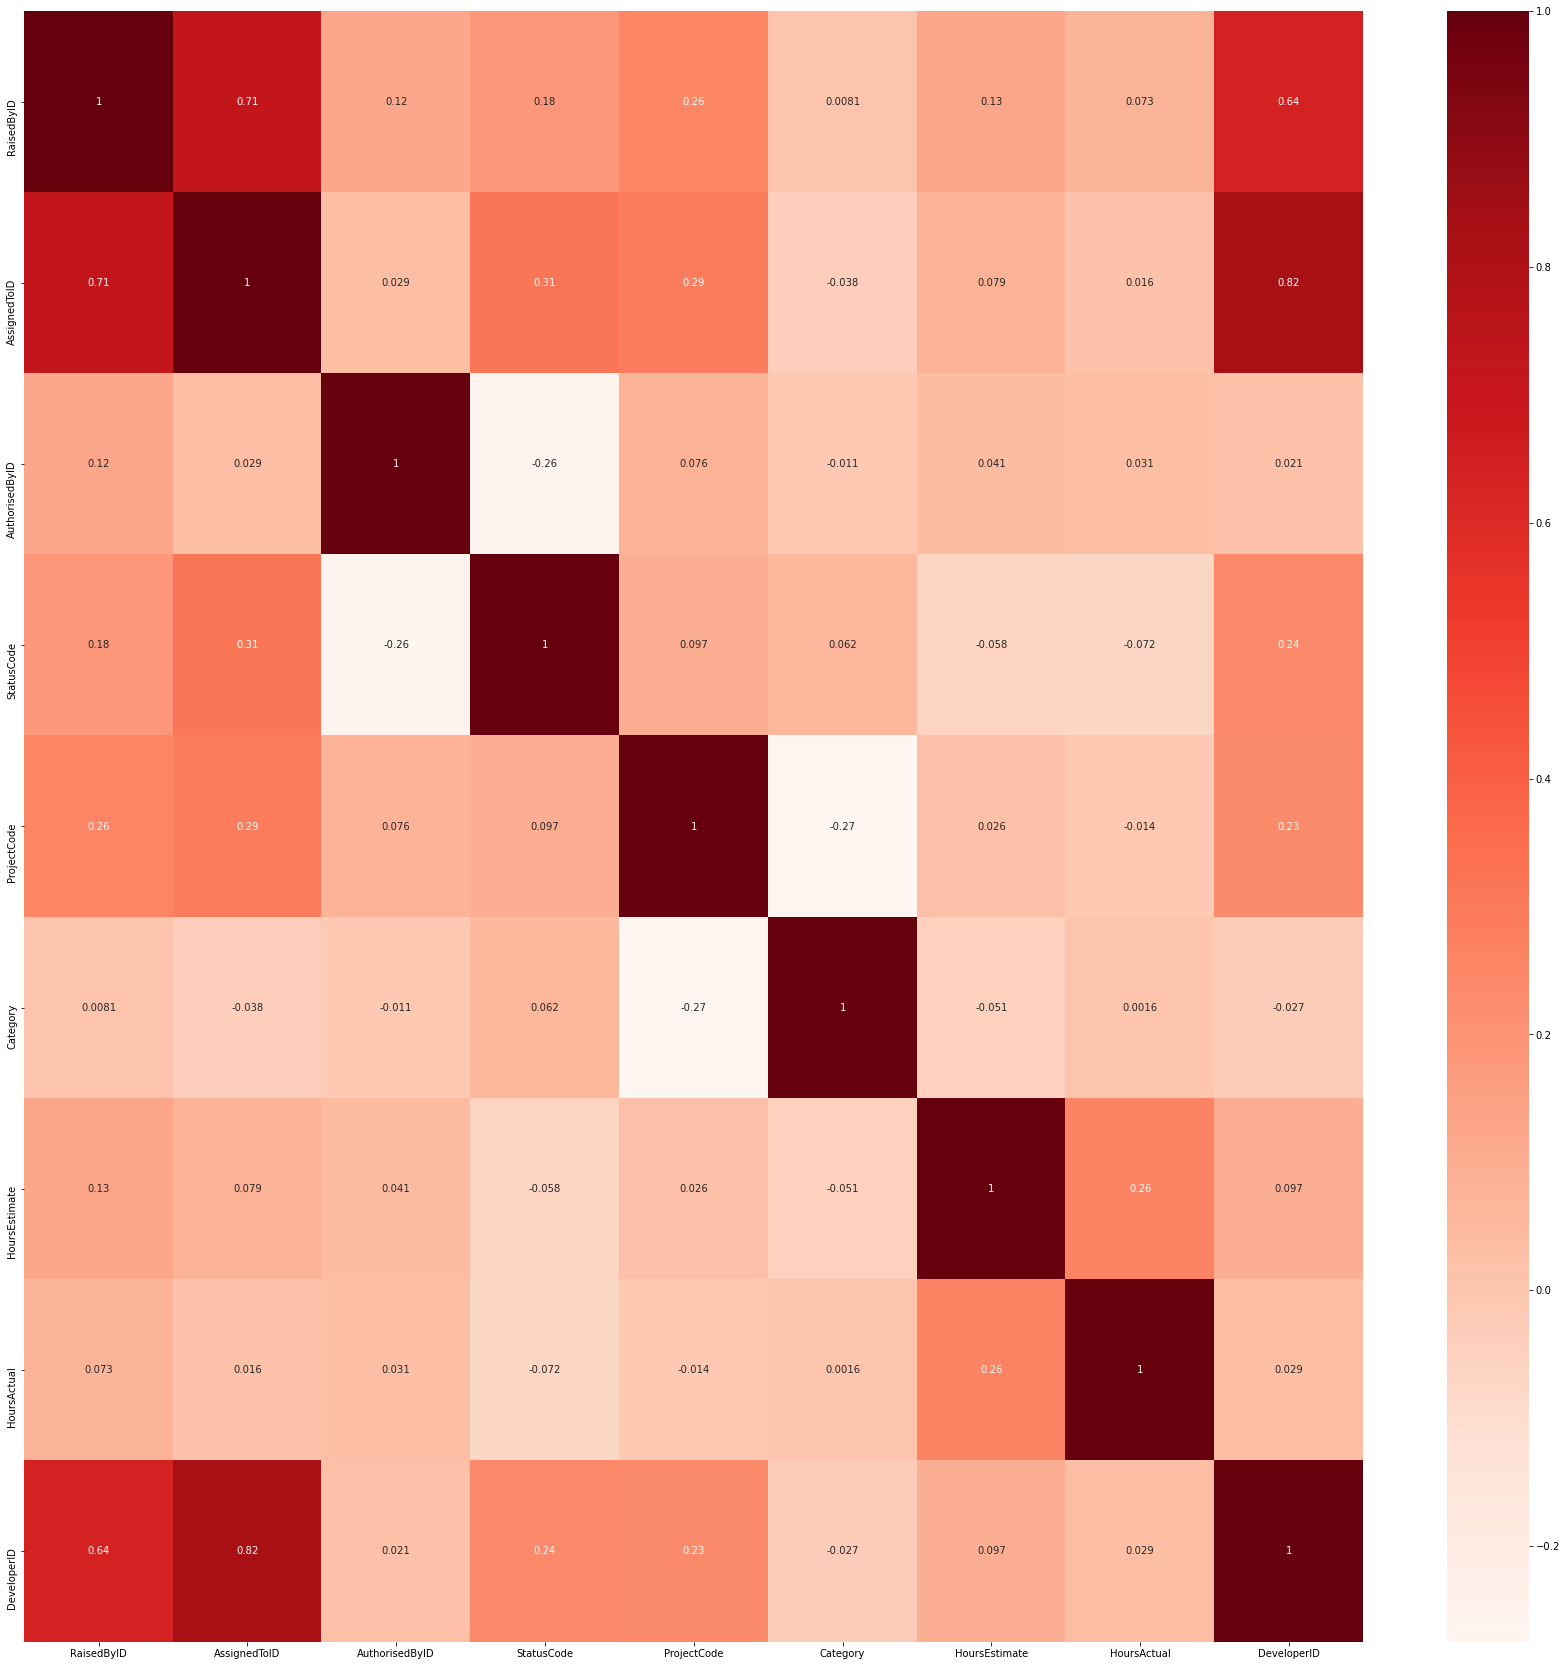

In [26]:
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(30,30))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [65]:
#Remove columns with low correlation values
df = df.drop(columns = ['Priority', 'ProjectBreakdownCode', 'SubCategory'])

In [29]:
# SVR

In [30]:
def launch_model(name,model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train[predictors], y_train)
    y_pred = model.predict(X_test[predictors])
    ypred_train = model.predict(X_train[predictors])
    print ('RMSE', math.sqrt(mean_squared_error(y_test, y_pred)))
    print ('MAE', mean_absolute_error(y_test, y_pred))
    r_2 = round(r2_score(y_test, y_pred), 2)
    print ('R^2', r_2)
    print('Execution time: {0:.2f} sec.'.format(time.time() - start))
    return name + '($R^2={:.3f}$)'.format(r_2), np.array(y_test), y_pred

In [31]:
def plot(results):

    fig, plts = plt.subplots(nrows=len(results), figsize=(8, 8))
    fig.canvas.set_window_title('Predicting Boston')

    for subplot, (title, y, y_pred) in zip(plts, results):

        subplot.set_xticklabels(())
        subplot.set_yticklabels(())

        subplot.set_ylabel('Precio casa')

        subplot.set_title(title)

        subplot.plot(y, 'b', label='actual')
        subplot.plot(y_pred, 'r', label='predicted')
        
        subplot.fill_between(
            np.arange(0, len(y), 1),
            y,
            y_pred,
            color='r',
            alpha=0.2
        )
        subplot.axvline(len(y) // 2, linestyle='--', color='0', alpha=0.2)
        subplot.legend()
    fig.tight_layout()
    plt.show()
    plt.savefig('plot.png')
    plt.close()

In [32]:
target = df['HoursActual']
predictors = ['RaisedByID', 'AssignedToID', 'AuthorisedByID', 'StatusCode',
       'ProjectCode', 'Category', 'HoursEstimate',
       'DeveloperID']
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [33]:
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_lineal = SVR(kernel='linear')
lr = LinearRegression()

In [34]:
results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - lineal')
print ('-----------')
results.append(launch_model('SVR - lineal', svr_lineal, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Regresion lineal')
print ('-----------')
results.append(launch_model('Regresion lineal', lr, X_train, y_train, X_test, y_test))

-----------
SVR - RBF
-----------
RMSE 56.76882537574144
MAE 10.057701733186938
R^2 -0.0
Execution time: 8.75 sec.
-----------
SVR - lineal
-----------
RMSE 54.6103926805774
MAE 9.532031868404342
R^2 0.07
Execution time: 263.05 sec.
-----------
Regresion lineal
-----------
RMSE 54.034632821265426
MAE 13.473326993314206
R^2 0.09
Execution time: 0.02 sec.


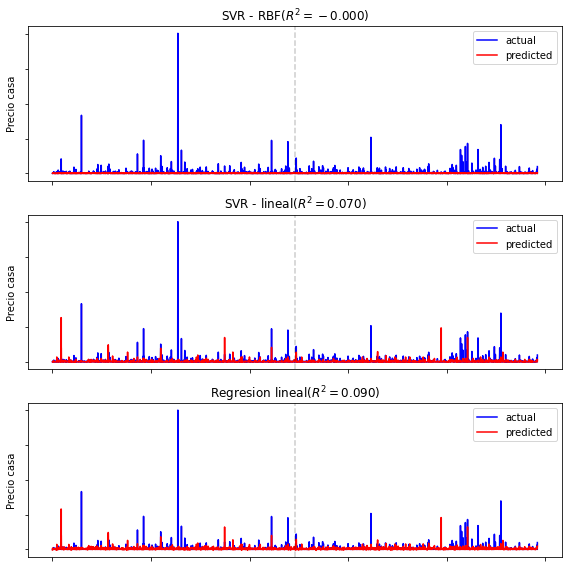

In [35]:
plot(results)

In [ ]:
# Random Forests

In [47]:
labels = np.array(df['HoursActual'])
df = df.drop('HoursActual', axis = 1)
feature_list = list(df.columns)
features = np.array(df)

In [48]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [49]:
rf = RandomForestRegressor(n_estimators = 100) #, random_state = 42
rf.fit(train_features, train_labels);

In [50]:
predictions = rf.predict(test_features)

In [51]:
mae = mean_absolute_error(test_labels, predictions)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(test_labels, predictions))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(test_labels, predictions), 2)
print('R^2:', r2)

Mean Absolute Error: 9.459656268788688
Mean Squared Error Root: 40.37720835056004
R^2: 0.56


In [52]:
results.append(('Random Forest' + '($R^2={:.3f}$)'.format(r2), np.array(y_test), predictions))

In [53]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
#In future implementations of the model, we can remove those variables 
# that have no importance and the performance will not suffer.

Variable: HoursEstimate        Importance: 0.3
Variable: AssignedToID         Importance: 0.26
Variable: ProjectCode          Importance: 0.12
Variable: RaisedByID           Importance: 0.1
Variable: DeveloperID          Importance: 0.1
Variable: StatusCode           Importance: 0.06
Variable: Category             Importance: 0.06
Variable: AuthorisedByID       Importance: 0.0


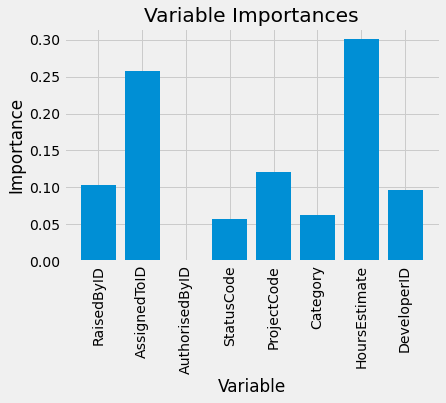

In [54]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
#GRNN

In [66]:
y = df['HoursActual'].values.ravel()
X = df.drop(["HoursActual"], axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(preprocessing.minmax_scale(X), y.reshape((-1, 1)), test_size=0.25, random_state = 42)

In [67]:
featnames=list(df.drop(["HoursActual"], axis = 1).columns)

In [68]:
IsotropicSelector = FS.Isotropic_selector()

Searching relatidness for feature 0
Best subset is: ['AssignedToID', 'AuthorisedByID', 'ProjectCode', 'Category', 'DeveloperID']
Searching relatidness for feature 1
Best subset is: ['RaisedByID', 'StatusCode', 'ProjectCode', 'DeveloperID']
Searching relatidness for feature 2
Best subset is: ['AssignedToID', 'StatusCode', 'ProjectCode', 'Category']
Searching relatidness for feature 3
Best subset is: ['RaisedByID', 'AssignedToID', 'AuthorisedByID', 'ProjectCode', 'Category', 'HoursEstimate']
Searching relatidness for feature 4
Best subset is: ['RaisedByID', 'AssignedToID', 'AuthorisedByID', 'StatusCode', 'Category', 'HoursEstimate']
Searching relatidness for feature 5
Best subset is: ['AssignedToID', 'StatusCode', 'ProjectCode']
Searching relatidness for feature 6
Best subset is: ['RaisedByID', 'AssignedToID', 'StatusCode', 'ProjectCode', 'Category']
Searching relatidness for feature 7
Best subset is: ['RaisedByID', 'AssignedToID', 'ProjectCode']
Time to complete the search [s]: 125.3796

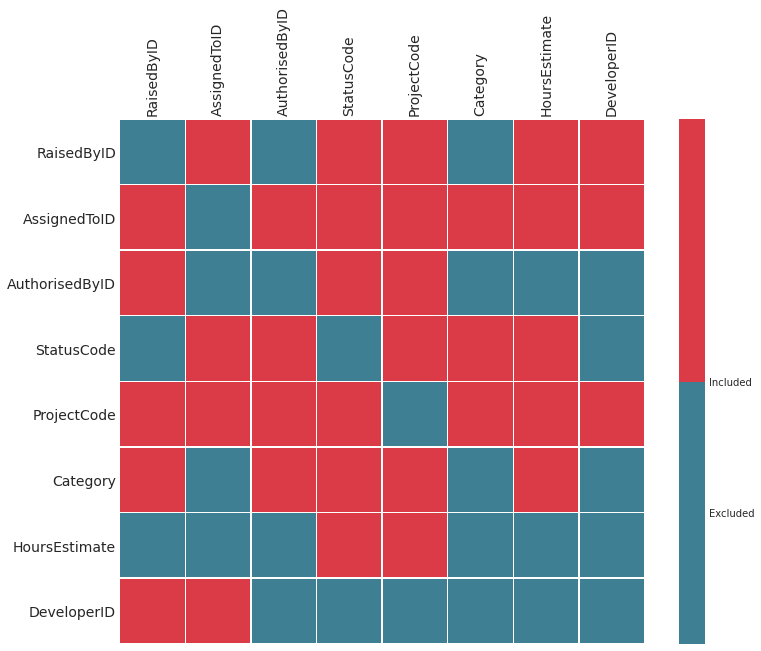

In [69]:
start = time.time()
IsotropicSelector.relatidness(X_train, feature_names=featnames, strategy = 'ffs')
IsotropicSelector.plot_(featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

In [70]:
print('Selecting the best subset of features using a forward fs strategy:')
start = time.time()
IsotropicSelector.ffs(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using a forward fs strategy:
Best subset is: ['RaisedByID', 'AssignedToID', 'StatusCode', 'ProjectCode', 'Category', 'HoursEstimate']
Time to complete the search [s]: 23.33861470222473


In [71]:
print('Selecting the best subset of features using a backward fs strategy:')
start = time.time()
IsotropicSelector.bfs(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using a backward fs strategy:
Best subset is: ['HoursEstimate', 'Category', 'ProjectCode', 'StatusCode', 'AssignedToID', 'RaisedByID']
Time to complete the search [s]: 15.05724573135376


In [72]:
print('Selecting the best subset of features using an exhaustive search:')
start = time.time()
IsotropicSelector.es(X_train, y_train, feature_names=featnames)
print('Time to complete the search [s]: ' + str(time.time() - start))

Selecting the best subset of features using an exhaustive search:
Exploring the 255 possible combination of features...
The best subset of features is ['RaisedByID', 'AssignedToID', 'StatusCode', 'ProjectCode', 'Category', 'HoursEstimate']
Time to complete the search [s]: 148.74216151237488


In [73]:
print('Performing a complete feature selection from scratch:')
start = time.time()
IsotropicSelector.feat_selection(X_train, y_train, feature_names=featnames, strategy = 'ffs')
print('Time to complete the feature selection [s]: ' + str(time.time() - start))

Performing a complete feature selection from scratch:
Searching relevant features...
Best subset is: ['RaisedByID', 'AssignedToID', 'StatusCode', 'ProjectCode', 'Category', 'HoursEstimate']
Searching the best subset to predict feature 0
Best subset is: ['AssignedToID', 'AuthorisedByID', 'ProjectCode', 'Category', 'DeveloperID']
[0, 3, 6]
Searching the best subset to predict feature 1
Best subset is: ['RaisedByID', 'StatusCode', 'ProjectCode', 'DeveloperID']
[1, 2, 5, 6]
Searching the best subset to predict feature 3
Best subset is: ['RaisedByID', 'AssignedToID', 'AuthorisedByID', 'ProjectCode', 'Category', 'HoursEstimate']
[3, 7]
Searching the best subset to predict feature 4
Best subset is: ['RaisedByID', 'AssignedToID', 'AuthorisedByID', 'StatusCode', 'Category', 'HoursEstimate']
[4, 7]
Searching the best subset to predict feature 5
Best subset is: ['AssignedToID', 'StatusCode', 'ProjectCode']
[0, 2, 5, 6, 7]
Searching the best subset to predict feature 6
Best subset is: ['RaisedByID

In [74]:
best_set = IsotropicSelector.best_inSpaceIndex
X_train_BestSet = X_train[:,best_set]
X_test_BestSet = X_test[:,best_set]

In [75]:
# Instantiate the estimator
IGRNN = GRNN()
# Define the parameters for a GridSearch CV and fit the model
params_IGRNN = {'kernel':["RBF"],
                'sigma' : list(np.arange(0.1, 4, 0.01)),
                'calibration' : ['None']
                 }
grid_IGRNN = GridSearchCV(estimator=IGRNN,
                          param_grid=params_IGRNN,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1,
                          n_jobs = -1
                          )
grid_IGRNN.fit(X_train_BestSet, y_train.ravel())
# Use the best model to perform prediction, and compute mse
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(X_test_BestSet)
mse_IGRNN = MSE(y_test, y_pred)
print('MSE with IGRNN (after feature selection): ' + str(mse_IGRNN))

Fitting 5 folds for each of 390 candidates, totalling 1950 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 1950 out of 1950 | elapsed: 10.1min finished


MSE with IGRNN (after feature selection): 3325.0765916037703


In [76]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(y_test, y_pred))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(y_test, y_pred), 2)
print('R^2:', r2)

Mean Absolute Error: 14.30063598799706
Mean Squared Error Root: 57.663477102961544
R^2: 0.11


In [ ]:
df.effort.mode()[0]

In [ ]:
#Usual NN

In [77]:
df.columns.values

array(['RaisedByID', 'AssignedToID', 'AuthorisedByID', 'StatusCode',
       'ProjectCode', 'Category', 'HoursEstimate', 'HoursActual',
       'DeveloperID'], dtype=object)

In [78]:
y1 = np.array(df.HoursActual)

x1 = np.column_stack((df.RaisedByID, df.AssignedToID, df.AuthorisedByID, df.StatusCode,
                      df.ProjectCode, df.Category, df.HoursEstimate,df.DeveloperID))
x1 = sm.add_constant(x1, prepend=True)

X_train, X_val, y_train, y_val = train_test_split(x1, y1)

In [79]:
# The training and validation data is then scaled using MinMaxScaler:
y_train=np.reshape(y_train, (-1,1))
y_val=np.reshape(y_val, (-1,1))
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)
print(scaler_x.fit(X_val))
xval_scale=scaler_x.transform(X_val)
print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)
print(scaler_y.fit(y_val))
yval_scale=scaler_y.transform(y_val)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [140]:
model = Sequential()
model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='elu'))
model.add(Dense(10000, activation='elu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_37 (Dense)             (None, 10000)             100000    
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 10001     
Total params: 110,091
Trainable params: 110,091
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(xtrain_scale, ytrain_scale, epochs=50, batch_size=350, verbose=1, validation_split=0.2)
predictions = model.predict(xval_scale)

Epoch 1/50
22/22 [==============================] - 2s 54ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0084 - val_loss: 1.4228e-04 - val_mse: 1.4228e-04 - val_mae: 0.0073
Epoch 2/50
22/22 [==============================] - 1s 42ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0075 - val_loss: 1.2489e-04 - val_mse: 1.2489e-04 - val_mae: 0.0045
Epoch 3/50
22/22 [==============================] - 1s 44ms/step - loss: 7.9721e-04 - mse: 7.9721e-04 - mae: 0.0061 - val_loss: 1.2669e-04 - val_mse: 1.2669e-04 - val_mae: 0.0058
Epoch 4/50
22/22 [==============================] - 1s 43ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0067 - val_loss: 1.2856e-04 - val_mse: 1.2856e-04 - val_mae: 0.0047
Epoch 5/50
22/22 [==============================] - 1s 41ms/step - loss: 6.6940e-04 - mse: 6.6940e-04 - mae: 0.0056 - val_loss: 1.2311e-04 - val_mse: 1.2311e-04 - val_mae: 0.0052
Epoch 6/50
22/22 [==============================] - 1s 40ms/step - loss: 7.9872e-04 - mse: 7.9872e-04 - mae: 0.0059 - val_loss: 1

22/22 [==============================] - 1s 44ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0062 - val_loss: 1.2507e-04 - val_mse: 1.2507e-04 - val_mae: 0.0056
Epoch 48/50
22/22 [==============================] - 1s 43ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0068 - val_loss: 1.2121e-04 - val_mse: 1.2121e-04 - val_mae: 0.0048
Epoch 49/50
22/22 [==============================] - 1s 40ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0062 - val_loss: 1.2179e-04 - val_mse: 1.2179e-04 - val_mae: 0.0050
Epoch 50/50
22/22 [==============================] - 1s 39ms/step - loss: 8.4666e-04 - mse: 8.4666e-04 - mae: 0.0056 - val_loss: 1.2359e-04 - val_mse: 1.2359e-04 - val_mae: 0.0055


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


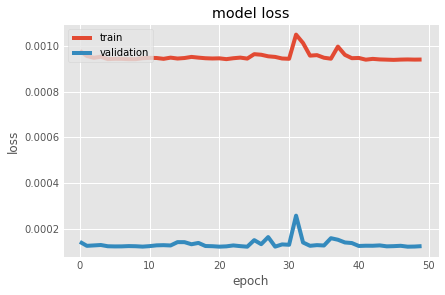

In [147]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [148]:
predictions = scaler_y.inverse_transform(predictions)

In [149]:
mae = mean_absolute_error(y_val, predictions)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(y_val, predictions))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(y_val, predictions), 2)
print('R^2:', r2)

Mean Absolute Error: 16.802601078593728
Mean Squared Error Root: 55.7439718841892
R^2: 0.01


In [122]:
np.mean(y_val)

11.764087804878049

In [123]:
np.mean(predictions)

34.20052

In [ ]:
# RBFN

In [150]:
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
#         print(input_shape)
#         print(self.units)
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff, 2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [176]:
model = Sequential()
#model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(9, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(RBFLayer(10000, 0.5))
model.add(Dense(1, activation='sigmoid', name='foo'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 9)                 90        
_________________________________________________________________
rbf_layer_4 (RBFLayer)       (None, 10000)             90000     
_________________________________________________________________
foo (Dense)                  (None, 1)                 10001     
Total params: 100,091
Trainable params: 100,091
Non-trainable params: 0
_________________________________________________________________


In [177]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse','mae'])

In [179]:
history=model.fit(xtrain_scale, ytrain_scale, epochs=30, batch_size=256, verbose=1, validation_split=0.2)

Epoch 1/30
29/29 [==============================] - 9s 329ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0057 - val_loss: 1.9026e-04 - val_mse: 1.9026e-04 - val_mae: 0.0047
Epoch 2/30
29/29 [==============================] - 9s 318ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0057 - val_loss: 1.9026e-04 - val_mse: 1.9026e-04 - val_mae: 0.0047
Epoch 3/30
29/29 [==============================] - 9s 312ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0057 - val_loss: 1.9026e-04 - val_mse: 1.9026e-04 - val_mae: 0.0047
Epoch 4/30
29/29 [==============================] - 9s 313ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0057 - val_loss: 1.9026e-04 - val_mse: 1.9026e-04 - val_mae: 0.0047
Epoch 5/30
29/29 [==============================] - 9s 317ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0057 - val_loss: 1.9026e-04 - val_mse: 1.9026e-04 - val_mae: 0.0047
Epoch 6/30
29/29 [==============================] - 9s 310ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0057 - val_loss: 1.9026e-04 - val_ms

In [180]:
predictions = model.predict(xval_scale)

In [181]:
predictions = scaler_y.inverse_transform(predictions)

In [182]:
mae = mean_absolute_error(y_val, predictions)
print('Mean Absolute Error:', mae)
mse_sqrt = math.sqrt(mean_squared_error(y_val, predictions))
print('Mean Squared Error Root:', mse_sqrt)
r2 = round(r2_score(y_val, predictions), 2)
print('R^2:', r2)
print(r2)

Mean Absolute Error: 11.754087804170705
Mean Squared Error Root: 57.277960592267746
R^2: -0.04
-0.04


In [174]:
np.mean(y_val)

11.764087804878049

In [175]:
np.mean(predictions)

22.657866